In [1]:
# import libraries
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

In [2]:
# load dataset: ev fiyat tahmini
housing = fetch_california_housing()
X = housing.data
y = housing.target

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
# define models
models = {
    "Bagging Regressor": BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=100,
        max_features=0.8,
        max_samples=0.8,
        random_state=42
    ),
    "Random Forest Regressor": RandomForestRegressor(
        n_estimators=100,
        max_depth=15,
        min_samples_split=5,
        random_state=42
    ),
    "Extra Trees Regressor": ExtraTreesRegressor(
        n_estimators=100,
        max_depth=15,
        min_samples_split=5,
        random_state=42
    )
}

In [4]:
# training ve testing
results = {}
predictions = {}
for name, model in tqdm(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}
    predictions[name] = y_pred

result_df = pd.DataFrame(results).T
print(result_df)

100%|██████████| 3/3 [00:13<00:00,  4.53s/it]

                              MSE        R2
Bagging Regressor        0.233243  0.822296
Random Forest Regressor  0.260335  0.801655
Extra Trees Regressor    0.286603  0.781643


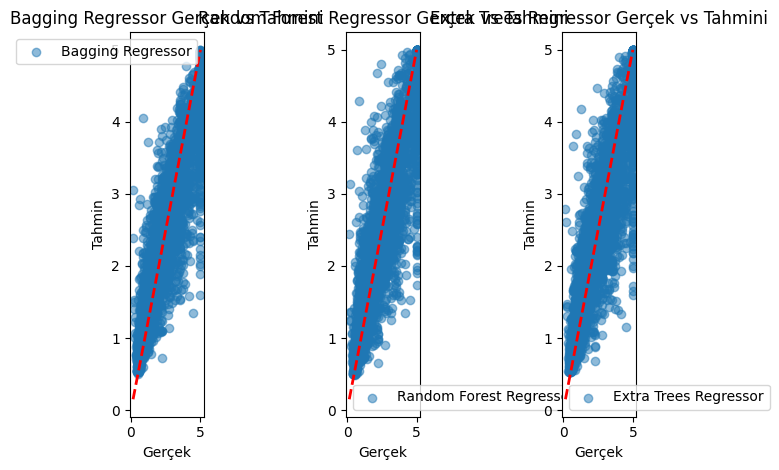

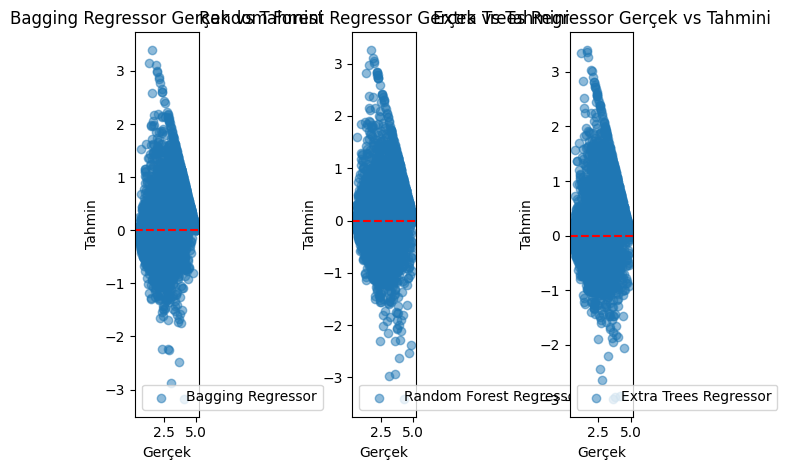

In [5]:
# visualize results – tahmin vs gerçek değerler
plt.figure()
for i, (name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(1, 3, i)
    plt.scatter(y_test, y_pred, alpha=0.5, label=name)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
    plt.title(f"{name} Gerçek vs Tahmini")
    plt.xlabel("Gerçek")
    plt.ylabel("Tahmin")
    plt.legend()
plt.tight_layout()
plt.show()

# visualize residuals (hatalar)
plt.figure()
for i, (name, y_pred) in enumerate(predictions.items(), 1):
    residuals = y_test - y_pred
    plt.subplot(1, 3, i)
    plt.scatter(y_pred, residuals, alpha=0.5, label=name)
    plt.axhline(y=0, color="r", linestyle="--")
    plt.title(f"{name} Gerçek vs Tahmini")
    plt.xlabel("Gerçek")
    plt.ylabel("Tahmin")
    plt.legend()
plt.tight_layout()
plt.show()

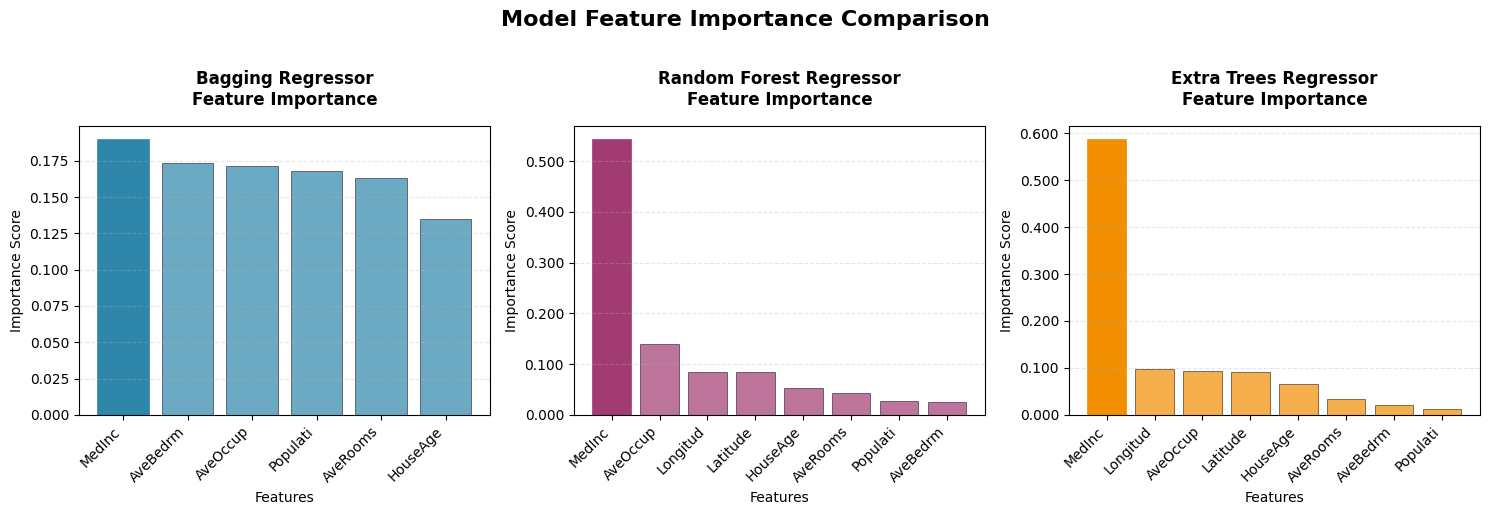

In [6]:
# feature importance
feature_names = housing.feature_names
plt.figure(figsize=(15, 5))

colors = ['#2E86AB', '#A23B72', '#F18F01']  # Güzel renkler

for i, (name, model) in enumerate(models.items(), 1):
    if hasattr(model, "feature_importances_"):
        importance = model.feature_importances_
    elif hasattr(model, "estimators_") and hasattr(model.estimators_[0], "feature_importances_"):
        # For ensemble models like Bagging
        importance = np.mean([
            est.feature_importances_ for est in model.estimators_
        ], axis=0)
    else:
        continue
    
    sorted_idx = np.argsort(importance)[::-1]
    
    plt.subplot(1, 3, i)
    bars = plt.bar(range(len(importance)), importance[sorted_idx], 
                   color=colors[i-1], alpha=0.7, edgecolor='black', linewidth=0.5)
    
    plt.xticks(range(len(importance)), 
               [feature_names[idx][:8] for idx in sorted_idx], 
               rotation=45, ha='right')
    
    plt.title(f"{name}\nFeature Importance", fontsize=12, fontweight='bold', pad=15)
    plt.xlabel("Features", fontsize=10)
    plt.ylabel("Importance Score", fontsize=10)
    
    # Y ekseni formatı
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.3f}'))
    
    # Grid ekleme
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    
    # En yüksek değeri vurgulama
    max_idx = np.argmax(importance[sorted_idx])
    bars[max_idx].set_color(colors[i-1])
    bars[max_idx].set_alpha(1.0)

plt.suptitle('Model Feature Importance Comparison', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()